# **Smoothing Filters**
---
## **What is it?**
Is a type of filter used to reduce **noise**, soften **edges**, creating a blurred or softened version of the image.

## **Why it is important?**
It is typically applied to make images look less noisy, supress small fluctuations, and remove details that are considered insignificant for a given task. It can make an image look more visually appealing by reducing harsh transitions between pixels and making the image softer and less pixelated.
## **Components**
**Kernel:** It is a small matrix that defines how pixel values are combined to create the smoothed pixel. The kernel is applied to each pixel in the image, an the new pixel value is calculated based on the pixel's neghbors.

### **Types of Kernels**
- **Averaging Kenel (Mean Filter):** Each pixel is replaced by the average of its neghboring pixels. The sum of each of the elements in the kernel should give the result of 1.
- **Gaussian Kernel (Gaussian Filter):** Is a matrix where the values are derived from the Gaussian function. The kernel gives **more weight to pixels near the center** an less for those further away, allowing for a smoother, natural blur. The kenel is normalized by dividing the sum of all values (16 in the example case), so the total wight equals 1.
#### **Example of a 3x3 Averaging Kernel**
<img src="..\src\imgs\smoothing_filter_kernel.PNG" alt="Smoothing Kernel" width="200px">

#### **Example of a 3x3 Gaussian Kernel**
<div style="display: flex; justify-content: space-between;">
    <img src="..\src\imgs\gaussian_filter_kernel_math.PNG" alt="Smoothing Kernel Operations" style="width: 45%; height: 300px; margin-right: 10px;">
    <img src="..\src\imgs\gaussian_filter_kernel.PNG" alt="Smoothing Kernel Operations" style="width: 45%; height: 300px">
</div>  

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv.imread(r"..\Images\rubberwhale1.png", 0)

In [3]:
img.shape

(388, 584)

In [4]:
img.size

226592

In [5]:
w = np.ones((3, 3), dtype=np.uint8) # Creates a 3x3 kernel with all ones 

In [6]:
w = w * 1/9 # Normalize the kernel so that the sum of all elements is 1

In [7]:
w.sum() # Check if thes sum is 1

1.0

In [8]:
img_filtered = cv.filter2D(img, -1, w) # Applies a 2D convolution with the filter 'w'

### ***cv.filter2D*** **function**  
**Components**
- ```cv.filter2D()``` --> Is an OpenCV function used to apply a **2D Convolution** to an image. 

**Parameters**
- ```-1``` --> Indicates that the output image should have the same depth as the input image.
- ```w``` --> Is the kernel or filter that will be apllied to the image

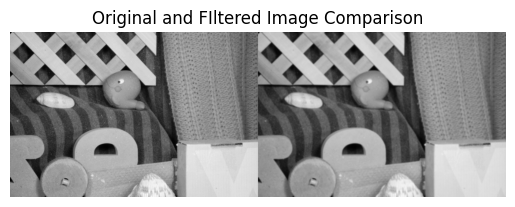

In [9]:
plt.imshow(np.hstack((img, img_filtered)), "gray")
plt.title("Original and FIltered Image Comparison")
plt.axis("off")
plt.show()

In [10]:
# Function that generates a n x n kernel. Each element of the kernel has a value of 1/n^2, ensuring the sum of the kernel is 1.
def gen_kernel(n):
    return np.ones((n, n), dtype=np.uint8) * 1/n**2 # Creates a n x n kernel

In [11]:
gen_kernel(21).sum() # Verify the sum of the generated kernel is 1

1.0000000000000002

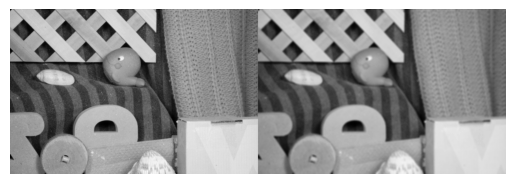

In [12]:
img_filtered = cv.filter2D(img, -1, gen_kernel(5)) # Applies a 5x5 kernel generated by the function
plt.imshow(np.hstack((img, img_filtered)), "gray")
plt.title("")
plt.axis("off")
plt.show()